# Iris flower ML

## 0. Prep
- Handle missing values
- Handle variable types
- Examine the variables 
- Adjust the variables if needed
- Come up with final dataframe

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier, DummyRegressor

%matplotlib inline 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
rnbw = ['#6FCC43', '#0DB8B5', '#D92727', '#FC8F12', '#FFE433',]
sns.set_palette(sns.color_palette(rnbw))

In [2]:
# load the data
df = pd.read_csv('./penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
df.shape

(344, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [5]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### Observation
Everyhting looks good. Standard deviation in the year column is abysmally small, so we I'll exclude the column from the models. 
We can't infer sex, so we'll drop all records. Other NaN counts are negligible, so we'll drop them as well

In [7]:
df.dropna(inplace=True)
df.drop('year', axis=1, inplace=True)

 
 
 
Let's examine how balanced are the variables. 

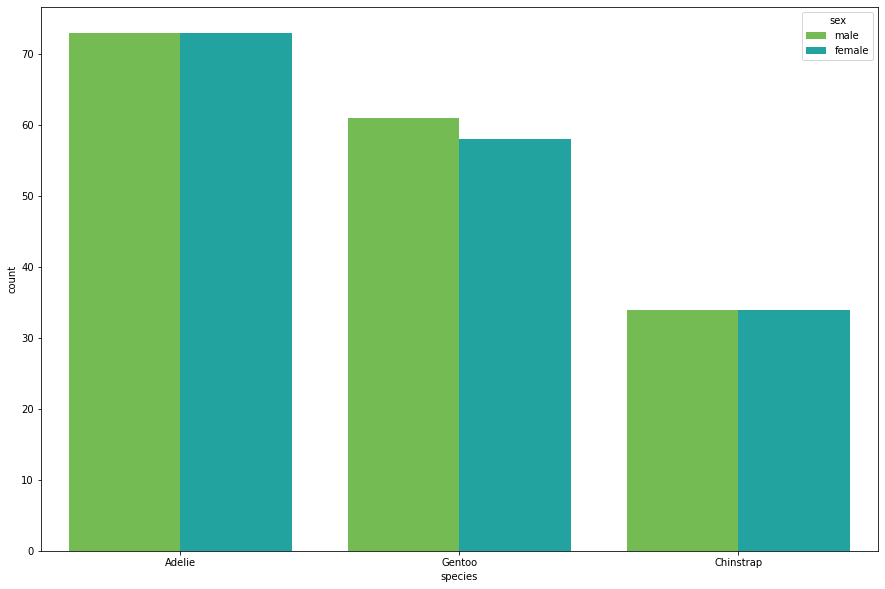

In [8]:
sns.countplot(data=df, x='species', hue='sex')

### Observation
Counts by sex aren't that different, they probably won't have much influence on model performance. But we will convert the variable into integers to include into the models.

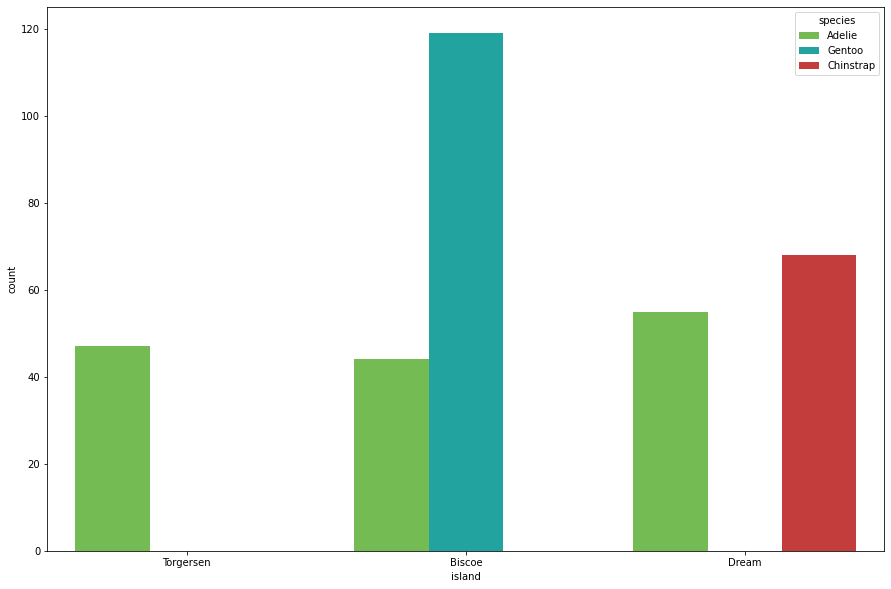

In [9]:
sns.countplot(data=df, x='island', hue='species')

### Observation
Islands is also unbalanced. Without deep domain knowledge of penguinology, I will assume that the islands don't matter much, even though evidently Gentoo and Chinstrap species are local to specific islands. For the sake of simplifying this analysis, we'll remove this variable. 

In [10]:
df.drop('island', axis=1, inplace=True)

In [11]:
df = pd.concat([df, pd.get_dummies(df['sex'])], axis=1)

In [12]:
penguins = df[['species','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','female', 'male']]

### Observation 
Final dataframe will consist of scpecies (target variable), bill length, bill depth, flipper length, body mass, and sex. 

## 1. Data visualisation
We need to visually inspect the variables to notice possible futher preparation steps we need to take.

In [13]:
penguins_without_sex = penguins[penguins.columns.difference(['female', 'male'])]

bill_depth_mm           AxesSubplot(0.125,0.536818;0.352273x0.343182)
bill_length_mm       AxesSubplot(0.547727,0.536818;0.352273x0.343182)
body_mass_g                AxesSubplot(0.125,0.125;0.352273x0.343182)
flipper_length_mm       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

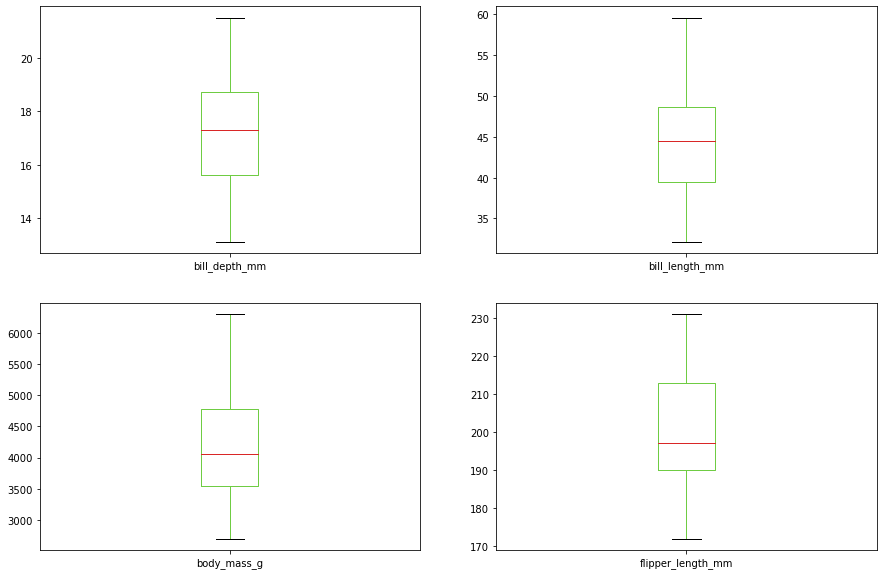

In [14]:
penguins_without_sex.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ebf129610>,
      dtype=object)

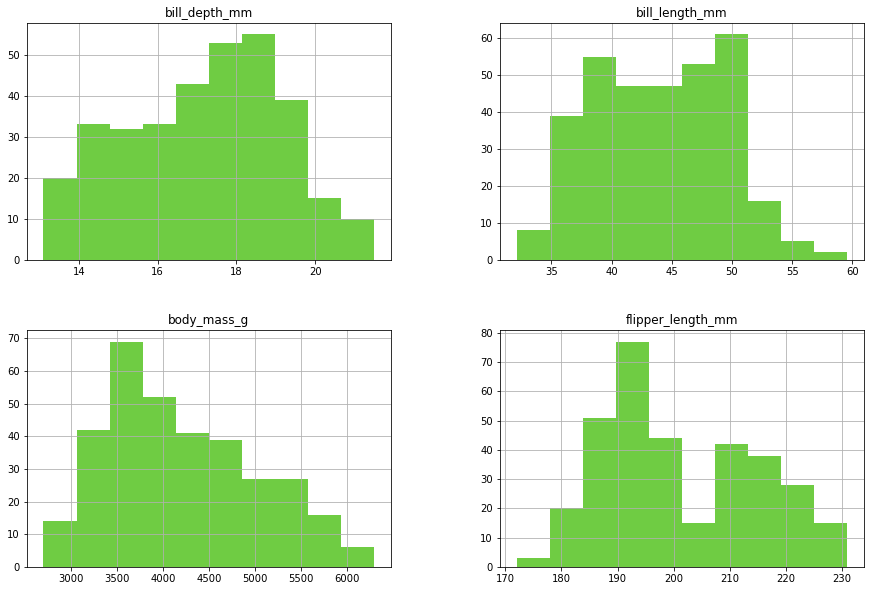

In [15]:
penguins_without_sex.hist()

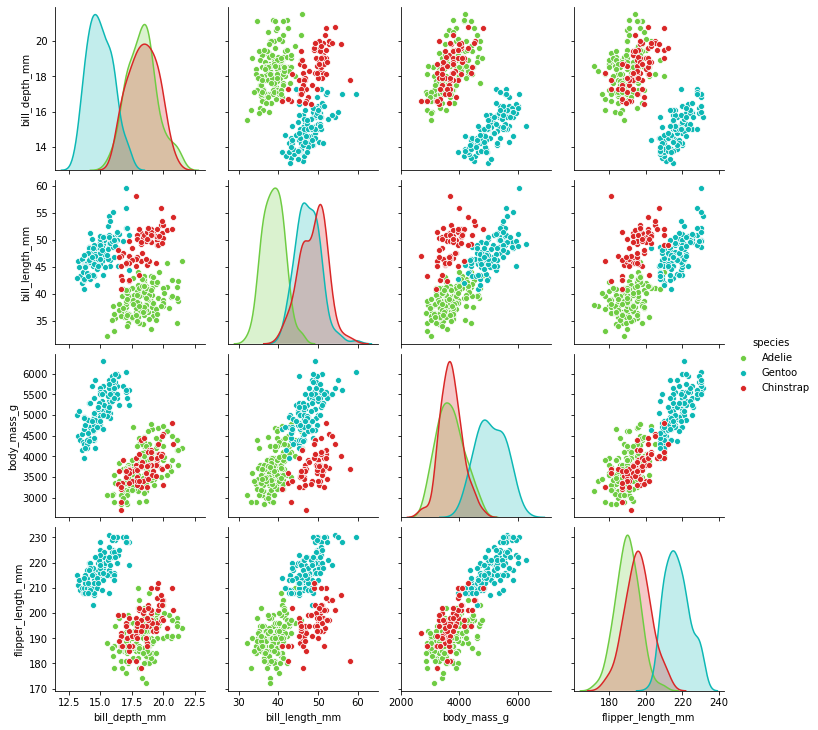

In [16]:
sns.pairplot(penguins_without_sex,hue='species')

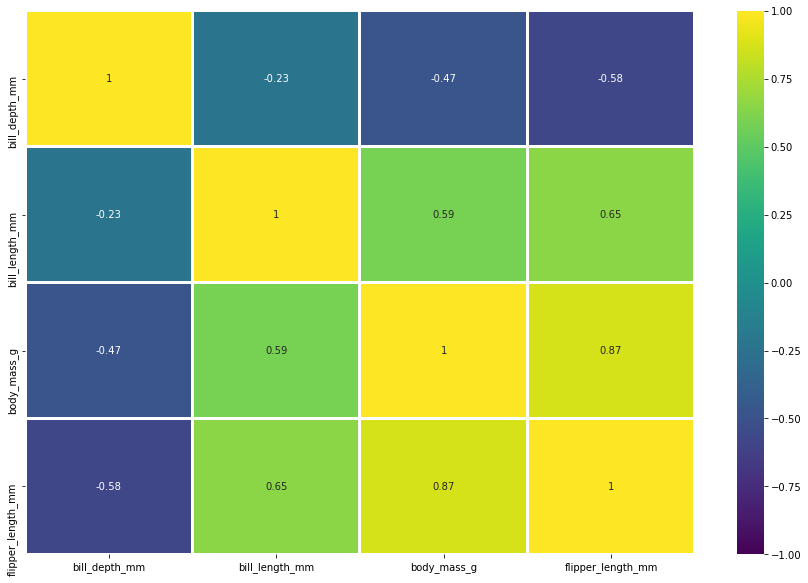

In [17]:
sns.heatmap(penguins_without_sex.corr(), vmin=-1, vmax=1, annot=True, linewidths=2, cmap='viridis')

### Observations
- Nothing extraordinary in the data distributions.
- We can see distinct groups in bill leng x depth, body mass x bill length, and bill length x flipper length. Which means that the models will not struggle too much. 

## 2. Data scaling

In [18]:
def scale(v):
    v = (v-v.min())/(v.max()-v.min())

scale(penguins['bill_depth_mm'])
scale(penguins['bill_length_mm'])
scale(penguins['body_mass_g'])
scale(penguins['flipper_length_mm'])


## 3. Evaluating ML algorithms

In [19]:
## Reshuffle the data so the models don't get comfy
penguins = penguins.sample(frac=1.0)#.reset_index(drop=True)

In [20]:
## Splitting the dataset into training, testing, and validation subsets
x = penguins.values[:,1:]
y = penguins.values[:,0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.5, random_state=256)

In [21]:
def train_models(x_train, y_train, x_validate, y_validate):
    
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('RC', RidgeClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('DTT', DecisionTreeClassifier(criterion='entropy')))
    models.append(('RFC', RandomForestClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    models.append(('DC', DummyClassifier(strategy='prior')))
    
    results = {}
    names = []
    
    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=29, shuffle=True)
        
        model.fit(x_train, y_train)
        
        score = model.score(x_validate, y_validate)
        
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')

        results[name] = {
                'score': score,
                'cv': (cv_results.mean(), cv_results.std()),
                }

        names.append(name)
        
    return (names, results)

In [22]:
def display_results(names, results):
    
    dummy_score = results['DC']['score']
    dummy_cv = results['DC']['cv']
    
    for name in (name for name in names if name != 'DC'):
        result = results[name]
        print("\t\t{}\t\tDummy".format(name))
        print('----------------------------------------------------------------')
        print("Score: \t\t{:.5f}\t\t{:.5f}".format(result['score'], dummy_score))
        print("CV mean: \t{:.5f}\t\t{:.5f}".format(result['cv'][0], dummy_cv[0]))
        print("CV std.: \t{:.5f}\t\t{:.5f}".format(result['cv'][1], dummy_cv[1]))
        print("----------------------------------------------------------------\n")

### Scoring and cross-validating the models

In [23]:
names, results = train_models(x_train, y_train, x_val, y_val)
display_results(names, results)

		LR		Dummy
----------------------------------------------------------------
Score: 		0.98795		0.38554
CV mean: 	0.98199		0.45147
CV std.: 	0.02753		0.02046
----------------------------------------------------------------

		RC		Dummy
----------------------------------------------------------------
Score: 		0.97590		0.38554
CV mean: 	0.98787		0.45147
CV std.: 	0.02428		0.02046
----------------------------------------------------------------

		LDA		Dummy
----------------------------------------------------------------
Score: 		0.98795		0.38554
CV mean: 	0.99412		0.45147
CV std.: 	0.01765		0.02046
----------------------------------------------------------------

		KNN		Dummy
----------------------------------------------------------------
Score: 		0.65060		0.38554
CV mean: 	0.78272		0.45147
CV std.: 	0.10523		0.02046
----------------------------------------------------------------

		DTT		Dummy
----------------------------------------------------------------
Score: 		0.95181		0.38554
CV

Great! Looks like our models are correct and they are much different from a random-chance dummy model. 🎉

The scores seem a bit high for my taste, probably beacause the validation data is so small. But cross-validation mean score is not that far from the scores, and standard deviations are small, so the models perform really well. 

As we can see, the most models perform very similarly, within a 1% margin. Logistic Regression and Support Vector Machine, however are underperforming. 

## 4. Pedictions

In [24]:
def predict(x_train, y_train, x_test):
    
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('RC', RidgeClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('DTT', DecisionTreeClassifier(criterion='entropy')))
    models.append(('RFC', RandomForestClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    models.append(('DC', DummyClassifier(strategy='prior')))

    predictions = {}
    names = []

    for name, model in models:
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)

        predictions[name] = prediction

        names.append(name)
        
    return (names, predictions)

In [25]:
names, predictions = predict(x_train, y_train, x_test)

In [26]:
print("\tAccuracy\n")
for name in (name for name in names if name != 'DC'):
    y_pred = predictions[name]
    print("{}: \t{:.5f}".format(name, accuracy_score(y_test, y_pred)))

	Accuracy

LR: 	0.98810
RC: 	1.00000
LDA: 	1.00000
KNN: 	0.85714
DTT: 	0.96429
RFC: 	0.96429
NB: 	0.97619
SVM: 	0.54762


## Best performing algorithm
Linear discriminant analysis, K-Nearest neighbours and Ridge classifier hold up with the never before seen test data. But lets test the other metrics as well.

In [27]:
confusion_matrix(y_test, predictions['LDA'])

array([[39,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 30]])

In [28]:
confusion_matrix(y_test, predictions['KNN'])

array([[36,  0,  3],
       [ 5,  8,  2],
       [ 2,  0, 28]])

In [29]:
confusion_matrix(y_test, predictions['RC'])

array([[39,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 30]])

In [30]:
print(classification_report(y_test, predictions['LDA']))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        39
   Chinstrap       1.00      1.00      1.00        15
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [31]:
print(classification_report(y_test, predictions['KNN']))

              precision    recall  f1-score   support

      Adelie       0.84      0.92      0.88        39
   Chinstrap       1.00      0.53      0.70        15
      Gentoo       0.85      0.93      0.89        30

    accuracy                           0.86        84
   macro avg       0.90      0.80      0.82        84
weighted avg       0.87      0.86      0.85        84



In [32]:
print(classification_report(y_test, predictions['RC']))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        39
   Chinstrap       1.00      1.00      1.00        15
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



### Observations
The KNN and RC metrics are exactly the same. In other fresh runs of this notebook, KNN performed the same as LDA most of the time. So in the latest run of this notebook the winners are:

## Winners
- Ridge Classifier
- Linear Discriminant Analysis 